In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8705 - loss: 0.4522 - val_accuracy: 0.9607 - val_loss: 0.1352
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9623 - loss: 0.1290 - val_accuracy: 0.9712 - val_loss: 0.1000
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9752 - loss: 0.0861 - val_accuracy: 0.9767 - val_loss: 0.0776
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9821 - loss: 0.0602 - val_accuracy: 0.9775 - val_loss: 0.0761
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9857 - loss: 0.0455 - val_accuracy: 0.9768 - val_loss: 0.0759
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9883 - loss: 0.0357 - val_accuracy: 0.9787 - val_loss: 0.0801
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9924 - loss: 0.0259 - val_accuracy: 0.9752 - val_loss: 0.0844
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9929 - loss: 0.0234

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"\nTest Loss: {test_loss:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9778 - loss: 0.0816

Test Accuracy: 0.9778

Test Loss: 0.0816


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


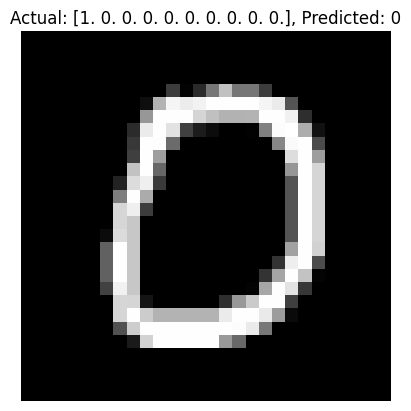

Prediction Probabilities: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
img = x_test[10]
label = y_test[10]

prediction = model.predict(img.reshape(1, 28, 28))
predicted_label = np.argmax(prediction)


plt.imshow(x_test[10].reshape(28, 28), cmap='gray')
plt.title(f"Actual: {label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()
print("Prediction Probabilities:", np.round(prediction, 3))
